# Bagging (Boostrap Aggregation)

## Ensemble Methods
**Voting Classifier**
* same training set,
* ≠ algorithms.
**Bagging**
* one algorithm,
* ≠ subsets of the training set.

## Bagging
* Bagging: Bootstrap Aggregation.
* Uses a technique known as the bootstrap.
* Reduces variance of individual models in the ensemble.

## Bagging: Classification & Regression
**Classification:**
* Aggregates predictions by majority voting.
* BaggingClassifier in scikit-learn.

**Regression:**
* Aggregates predictions through averaging.
* BaggingRegressor in scikit-learn

## Bagging Classifier in sklearn (Breast-Cancer dataset)

In [1]:
import pandas as pd
wbc = pd.read_csv('wbc.zip')
X = wbc.iloc[:, 2:-1]
y = pd.Categorical(wbc['diagnosis']).codes
X.shape

(569, 30)

In [2]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)

In [3]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree Classifier: {:.3f}'.format(accuracy))

Accuracy of Decision Tree Classifier: 0.889


In [4]:
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(estimator=dt, n_estimators=300, n_jobs=-1, random_state=SEED)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.936


## Bagging Classifier in sklearn (Indian liver pacient)

In [5]:
indian = pd.read_csv('indian_liver_patient.zip').dropna()
indian['Gender'] = pd.Categorical(indian['Gender']).codes
indian

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
X = indian.iloc[:, :-1]
y = indian['Dataset']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

In [8]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

In [9]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree Classifier: {:.3f}'.format(accuracy))

Accuracy of Decision Tree Classifier: 0.716


In [10]:
# Instantiate bc
bc = BaggingClassifier(estimator=dt, n_estimators=100, random_state=1)
# Fit bc to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.73


## Out of Bag Evaluation

## Bagging
* some instances may be sampled several times for one model,
* other instances may not be sampled at all.

## Out Of Bag (OOB) instances
* On average, for each model, 63% of the training instances are sampled.
* The remaining 37% constitute the OOB instances.

## OOB Evaluation in sklearn (Breast Cancer Dataset)

In [11]:
import pandas as pd
wbc = pd.read_csv('wbc.zip')
X = wbc.iloc[:, 2:-1]
y = pd.Categorical(wbc['diagnosis']).codes
X.shape

(569, 30)

In [12]:
# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)

In [13]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,
                            min_samples_leaf=0.16,
                            random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree Classifier: {:.3f}'.format(accuracy))

Accuracy of Decision Tree Classifier: 0.889


In [14]:
# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(estimator=dt, n_estimators=300,
                       oob_score=True, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.936


In [15]:
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.922


> Note that in scikit-learn, the OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors.

> These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation. 

## OOB Evaluation in sklearn (Breast Cancer Dataset)

In [16]:
indian = pd.read_csv('indian_liver_patient.zip').dropna()
indian['Gender'] = pd.Categorical(indian['Gender']).codes
X = indian.iloc[:, :-1]
y = indian['Dataset']

In [17]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree Classifier: {:.3f}'.format(accuracy))

Accuracy of Decision Tree Classifier: 0.924


In [18]:
# Instantiate bc
bc = BaggingClassifier(estimator=dt,
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.942


In [19]:
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.947


# Random Forests

## Bagging
* Base estimator: Decision Tree, Logistic Regression, Neural Net, ...
* Each estimator is trained on a distinct bootstrap sample of the training set
* Estimators use all features for training and prediction

## Further Diversity with Random Forests
* Base estimator: Decision Tree
* Each estimator is trained on a different bootstrap sample having the same size as the training set
* RF introduces further randomization in the training of individual trees: **feature sampling**
* When each tree is trained, only $d$ features can be sampled at each node without replacement, where $d$ is a number smaller than the total number of features.
    * $d$ features are sampled at each node without replacement  
    ($d$ < total number of features )
    
>  In scikit-learn $d$ defaults to the square-root of the number of features

## Random Forests: Classification & Regression
**Classification:**
* Aggregates predictions by majority voting
* RandomForestClassifier in scikit-learn

**Regression:**
* Aggregates predictions through averaging
* RandomForestRegressor in scikit-learn

> In general, Random Forests achieves a lower variance than individual trees. 

## Random Forests Regressor in sklearn (auto dataset)

In [20]:
auto = pd.read_csv('auto.zip')
X = auto.iloc[:, 1:]
X['origin'] = pd.Categorical(X['origin']).codes
y = auto['mpg']

In [21]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [22]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
                           min_samples_leaf=0.12,
                           random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


## Random Forests Regressor in sklearn (Bike Sharing Demand)

In [23]:
bikes = pd.read_csv('bikes.zip')
X = bikes.drop(columns=['cnt'])
y = bikes['cnt']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)
# Fit rf to the training set    
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


## Feature Importance
Tree-based methods: enable measuring the importance of each feature in prediction.  
In sklearn:
* how much the tree nodes use a particular feature (weighted average) to reduce impurity
* accessed using the attribute `feature_importance_`

## Feature Importance in sklearn

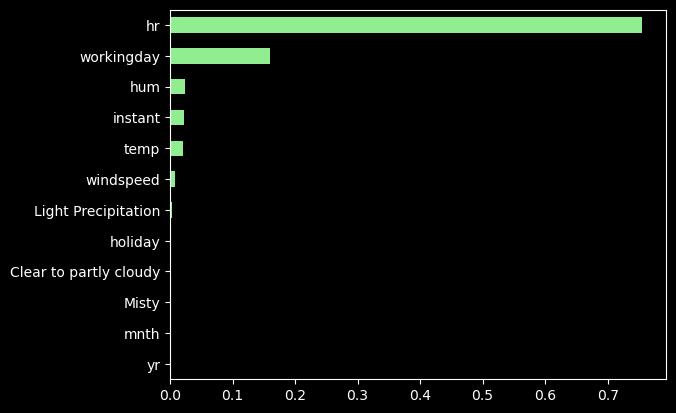

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()